In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [188]:
# data = np.loadtxt('spambase_csv.csv')
data = pd.read_csv('spambase_csv.csv')
data = shuffle(data)

# Scale features and split data 80:20

In [197]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values
y = y[:, None]

X_scaled = X
X_scaled = (X_scaled - X_scaled.mean(axis=0))/X_scaled.std(axis=0)
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [198]:
def logisticFunction(theta,X):
    return 1/(1+np.exp(-X@theta))

In [199]:
def costFunction(theta,X,y,lambdaReg):
    epsilon = 1e-5
    h = logisticFunction(theta,X)
    m = y.shape[0]
    firstTerm = -y.T@(np.log(h + epsilon))
    secondTerm = -(1.0-y).T@np.log(1-h + epsilon)
    result = (1/m)*((firstTerm + secondTerm) + lambdaReg*(theta.T@theta))
    return result[0,0]

In [200]:
def gradient(theta, X, y, alpha, lambdaReg):
    m = y.shape[0]
    h = logisticFunction(theta,X)
    return alpha/m * ( np.transpose(X)@(h - y) + lambdaReg * theta)

# Train the model

In [233]:
def train_model(X,y,lim,alpha,lambdaReg):
    costs = []
    thetas = np.random.rand(X_train.shape[1])
    # thetas = np.insert(thetas, 0, 1., axis=0)
    thetas = thetas[:,None]
    for n in np.arange(lim):
        thetas = thetas - gradient(thetas,X_train,y_train,alpha, lambdaReg)
        costs.append(costFunction(thetas,X_train,y_train, lambdaReg))
    return thetas

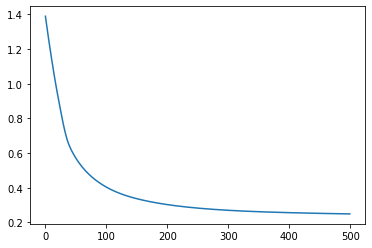

In [205]:
plt.plot(np.arange(lim),costs)

In [226]:
y_prediction = np.around(logisticFunction(thetas_final,X_test));
CM = confusion_matrix(y_test, y_prediction)
TN = CM[0,0]
FP = CM[0,1]
FN = CM[1,0]
TP = CM[1,1]
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
f1Score = 2 * (1/Precision + 1/Recall)

# Train the model using K-fold CV

In [248]:
lambdas = [0.0, 0.001, 0.005, 0.01, 0.015, 0.02, 0.04, 0.08, 0.15, 0.5, 1.0, 2.0, 4.0, 8.0]

In [254]:
f1Scores = []
for lambdaReg in lambdas:
    f1ScoreTotal = 0
    nSplits = 5
    kf = KFold(n_splits = nSplits)
    kFolded = kf.get_n_splits(X_train)
    limitConv = 1000
    alpha = 0.001
    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test, y_train, y_test = X_scaled[train_index], X_scaled[test_index], y[train_index], y[test_index]
        thetas =  train_model(X_train, y_train, limitConv, alpha, lambdaReg)
        y_prediction = np.around(logisticFunction(thetas,X_test));
        CM = confusion_matrix(y_test, y_prediction)
        TN = CM[0,0]
        FP = CM[0,1]
        FN = CM[1,0]
        TP = CM[1,1]
        Precision = TP/(TP + FP)
        Recall = TP/(TP + FN)
        f1ScoreTotal = f1ScoreTotal +  2 * (1/Precision + 1/Recall)
    f1ScoreAverage = f1ScoreTotal/nSplits
    print(f1ScoreAverage)
    f1Scores.append(f1ScoreAverage)

6.598091057295932
6.4706989573919484
6.454611824030256
6.614925542601332
6.415721494371589
6.358258440534225
6.446026282538294
6.473074191540292
6.3913108345253615
6.5353303940176515
6.380082711866641
6.248206354664835
6.379652088773975
6.3878441643152115


In [258]:
print(np.transpose([lambdas,f1Scores]))

[[0.00000000e+00 6.59809106e+00]
 [1.00000000e-03 6.47069896e+00]
 [5.00000000e-03 6.45461182e+00]
 [1.00000000e-02 6.61492554e+00]
 [1.50000000e-02 6.41572149e+00]
 [2.00000000e-02 6.35825844e+00]
 [4.00000000e-02 6.44602628e+00]
 [8.00000000e-02 6.47307419e+00]
 [1.50000000e-01 6.39131083e+00]
 [5.00000000e-01 6.53533039e+00]
 [1.00000000e+00 6.38008271e+00]
 [2.00000000e+00 6.24820635e+00]
 [4.00000000e+00 6.37965209e+00]
 [8.00000000e+00 6.38784416e+00]]


# I got the highest score with $\lambda = 0.01$